In [2]:
import tensorflow as tf

f:\dev\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
f:\dev\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
f:\dev\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
f:\dev\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type

In [4]:
tf.__version__

'1.12.0'

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
(train_image,train_label),(test_image,test_label)=tf.keras.datasets.fashion_mnist.load_data()

In [7]:
train_image.shape

(60000, 28, 28)

In [8]:
test_image.shape,test_label.shape

((10000, 28, 28), (10000,))

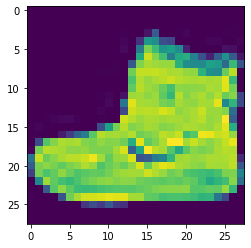

In [9]:
plt.imshow(train_image[0])

In [10]:
np.max(train_image[0])

255

In [11]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
train_image = train_image/255
test_image = test_image/255

In [13]:
train_image.shape

(60000, 28, 28)

In [14]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) #28*28
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [15]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['acc']
             )

In [16]:
model.fit(train_image,train_label,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 114us/step - loss: 0.4962 - acc: 0.8251
Epoch 2/5
60000/60000 [==============================] - 7s 109us/step - loss: 0.3728 - acc: 0.8652
Epoch 3/5
60000/60000 [==============================] - 7s 114us/step - loss: 0.3342 - acc: 0.8780
Epoch 4/5
60000/60000 [==============================] - 8s 129us/step - loss: 0.3125 - acc: 0.8844
Epoch 5/5
60000/60000 [==============================] - 7s 115us/step - loss: 0.2940 - acc: 0.8919


In [17]:
model.evaluate(test_image,test_label)

10000/10000 [==============================] - 1s 65us/step


[0.34498377358913423, 0.8761]

In [18]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [19]:
test_label

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [20]:
train_label_onehot = tf.keras.utils.to_categorical(train_label)

In [21]:
train_label_onehot

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
test_label_onehot = tf.keras.utils.to_categorical(test_label)

In [23]:
test_label_onehot

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) #28*28
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
             loss='categorical_crossentropy',
              metrics=['acc']
             )

In [27]:
model.fit(train_image,train_label_onehot,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 130us/step - loss: 0.5243 - acc: 0.8124
Epoch 2/5
60000/60000 [==============================] - 7s 120us/step - loss: 0.4330 - acc: 0.8464
Epoch 3/5
60000/60000 [==============================] - 6s 106us/step - loss: 0.4121 - acc: 0.8531
Epoch 4/5
60000/60000 [==============================] - 6s 99us/step - loss: 0.4038 - acc: 0.8572
Epoch 5/5
60000/60000 [==============================] - 7s 109us/step - loss: 0.3917 - acc: 0.8598


In [28]:
predict = model.predict(test_image)

In [29]:
predict

array([[2.3951500e-06, 5.9450139e-10, 2.4630729e-13, ..., 1.8588906e-02,
        9.8730903e-05, 9.1971707e-01],
       [6.8862260e-05, 7.2948377e-11, 9.9918145e-01, ..., 8.0846283e-35,
        1.6024372e-09, 2.9814228e-23],
       [5.3707933e-10, 1.0000000e+00, 2.0822370e-14, ..., 0.0000000e+00,
        4.5685031e-12, 1.4686852e-25],
       ...,
       [9.7209352e-07, 2.6417324e-09, 9.0017289e-07, ..., 6.7634637e-23,
        9.9989522e-01, 8.6174942e-17],
       [5.8857524e-10, 9.9994147e-01, 1.4202062e-15, ..., 5.7054985e-16,
        2.8107112e-09, 7.6264543e-14],
       [1.9567429e-05, 1.0695069e-08, 4.3115526e-04, ..., 2.1662870e-02,
        1.7718606e-02, 3.4797643e-03]], dtype=float32)

In [30]:
predict.shape

(10000, 10)

In [31]:
predict[0]

array([2.3951500e-06, 5.9450139e-10, 2.4630729e-13, 2.8759169e-07,
       2.6720715e-12, 6.1592553e-02, 1.0762827e-10, 1.8588906e-02,
       9.8730903e-05, 9.1971707e-01], dtype=float32)

In [32]:
np.argmax(predict[0])

9

In [33]:
test_label[0]

9

In [34]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) #28*28
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [36]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
             loss='categorical_crossentropy',
              metrics=['acc'],
             )

In [37]:
history = model.fit(train_image,train_label_onehot,epochs=10,validation_data = (test_image,test_label_onehot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 215us/step - loss: 0.8587 - acc: 0.6854 - val_loss: 0.5205 - val_acc: 0.8221
Epoch 2/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.6071 - acc: 0.7868 - val_loss: 0.4632 - val_acc: 0.8274
Epoch 3/10
60000/60000 [==============================] - 11s 182us/step - loss: 0.5551 - acc: 0.8051 - val_loss: 0.4417 - val_acc: 0.8388
Epoch 4/10
60000/60000 [==============================] - 13s 215us/step - loss: 0.5367 - acc: 0.8118 - val_loss: 0.4249 - val_acc: 0.8448
Epoch 5/10
60000/60000 [==============================] - 14s 234us/step - loss: 0.5186 - acc: 0.8216 - val_loss: 0.4478 - val_acc: 0.8392
Epoch 6/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.5107 - acc: 0.8217 - val_loss: 0.4214 - val_acc: 0.8516
Epoch 7/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.5006 - acc: 0.8247 - val_loss: 0.

In [38]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

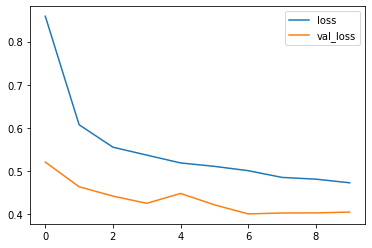

In [39]:
plt.plot(history.epoch,history.history.get('loss'),label='loss')
plt.plot(history.epoch,history.history.get('val_loss'),label='val_loss')
plt.legend()

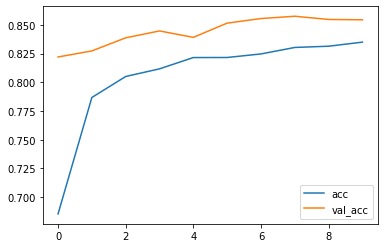

In [40]:
plt.plot(history.epoch,history.history.get('acc'),label='acc')
plt.plot(history.epoch,history.history.get('val_acc'),label='val_acc')
plt.legend()

过拟合: 在训练数据上得分很高,在测试数据上得分相对比较低

欠拟合: 在训练数据上得分比较低,在测试数据上得分相对比较低

In [41]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) #28*28
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [42]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
             loss='categorical_crossentropy',
              metrics=['acc'],
             )

In [43]:
history = model.fit(train_image,train_label_onehot,epochs=10,validation_data = (test_image,test_label_onehot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.5455 - acc: 0.8117 - val_loss: 0.4505 - val_acc: 0.8404
Epoch 2/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.4150 - acc: 0.8536 - val_loss: 0.4191 - val_acc: 0.8525
Epoch 3/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.3813 - acc: 0.8660 - val_loss: 0.4284 - val_acc: 0.8509
Epoch 4/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.3568 - acc: 0.8714 - val_loss: 0.4104 - val_acc: 0.8557
Epoch 5/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.3444 - acc: 0.8757 - val_loss: 0.3755 - val_acc: 0.8661
Epoch 6/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.3291 - acc: 0.8814 - val_loss: 0.3749 - val_acc: 0.8649
Epoch 7/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.3192 - acc: 0.8845 - val_loss: 0.3958 - v

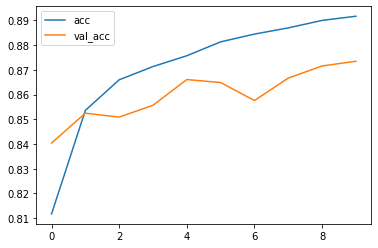

In [44]:
plt.plot(history.epoch,history.history.get('acc'),label='acc')
plt.plot(history.epoch,history.history.get('val_acc'),label='val_acc')
plt.legend()